## Exploration of data from CareerCon 2019 competition
 - [Competition page](https://www.kaggle.com/c/career-con-2019)
 - I'm not sure what kind of robot the data comes from, but looks like something similar to this
https://www.youtube.com/watch?v=I6z26LVu5y0

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
y_df = pd.read_csv('data/y_train.csv')


In [3]:
y_df.head()

,series_id,group_id,surface
0,0,13,fine_concrete
1,1,31,concrete
2,2,20,concrete
3,3,31,concrete
4,4,22,soft_tiles


In [4]:
# What surfaces are there?
y_df.surface.value_counts()

concrete                  779
soft_pvc                  732
wood                      607
tiled                     514
fine_concrete             363
hard_tiles_large_space    308
soft_tiles                297
carpet                    189
hard_tiles                 21
Name: surface, dtype: int64

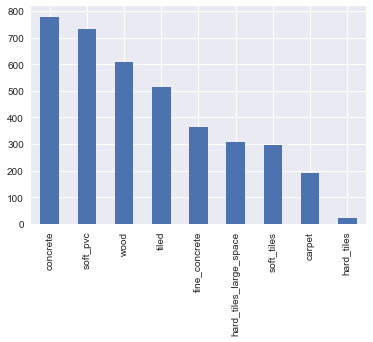

In [5]:
y_df.surface.value_counts().plot(kind='bar')

In [6]:
X_df = pd.read_csv('data/X_train.csv')

In [7]:
X_df.head()

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0_0,0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532
1,0_1,0,1,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003385,0.33995,1.5064,-9.4128
2,0_2,0,2,-0.75853,-0.63435,-0.10492,-0.10597,0.007275,0.028934,-0.005978,-0.26429,1.5922,-8.7267
3,0_3,0,3,-0.75852,-0.63436,-0.10495,-0.10597,-0.013053,0.019448,-0.008974,0.42684,1.0993,-10.0960
4,0_4,0,4,-0.75852,-0.63435,-0.10495,-0.10596,0.005135,0.007652,0.005245,-0.50969,1.4689,-10.4410


In [8]:
# A bit more convenient way to look at all the columns
X_df.head().transpose()

,0,1,2,3,4
row_id,0_0,0_1,0_2,0_3,0_4
series_id,0,0,0,0,0
measurement_number,0,1,2,3,4
orientation_X,-0.75853,-0.75853,-0.75853,-0.75852,-0.75852
orientation_Y,-0.63435,-0.63434,-0.63435,-0.63436,-0.63435
orientation_Z,-0.10488,-0.1049,-0.10492,-0.10495,-0.10495
orientation_W,-0.10597,-0.106,-0.10597,-0.10597,-0.10596
angular_velocity_X,0.10765,0.067851,0.0072747,-0.013053,0.0051349
angular_velocity_Y,0.017561,0.029939,0.028934,0.019448,0.0076517
angular_velocity_Z,0.00076741,0.0033855,-0.0059783,-0.0089735,0.0052452


### Plot some data

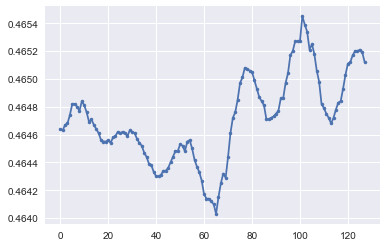

In [9]:
# plot some data for one sample (series)
series = 5
df = X_df[X_df.series_id==series]
ax = plt.plot(df.measurement_number, df.orientation_X, '.-')

Seriens #5, surface: tiled


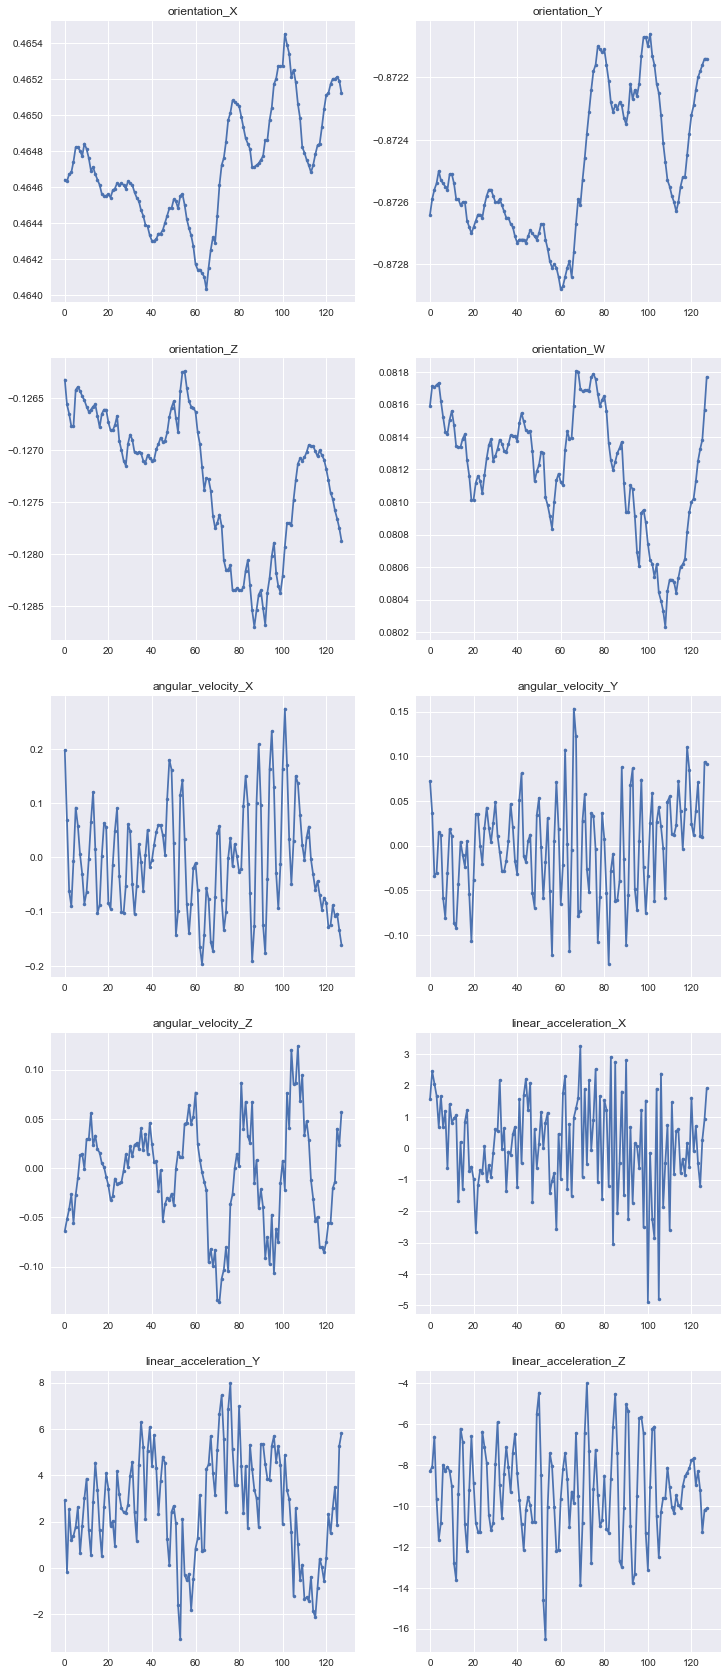

In [10]:
# Plot all 10 sensor measurements (features) for one sample

sensor_cols = ['orientation_X',
               'orientation_Y',
               'orientation_Z',
               'orientation_W',
               'angular_velocity_X',
               'angular_velocity_Y',
               'angular_velocity_Z',
               'linear_acceleration_X',
               'linear_acceleration_Y',
               'linear_acceleration_Z',
              ]


series = 5
# A dataframe with data for only one series
df = X_df[X_df.series_id==series]
surface = y_df[y_df.series_id==series].surface.iloc[0]
print('Seriens #%d, surface: %s' %(series, surface))

plt.figure(figsize=(12,30))

for i, col in enumerate(sensor_cols):
    plt.subplot(5,2,i+1)
    plt.plot(df.measurement_number, df[col], '.-')
    plt.title(col)
    

### Add computed features
 

In [11]:
# Total angular velocity
X_df['ang_velocity'] = np.sqrt(X_df.angular_velocity_X**2 + 
                               X_df.angular_velocity_Y**2 + 
                               X_df.angular_velocity_Z**2)

In [12]:
# Total linear acceleration
X_df['lin_accel'] = np.sqrt(X_df.linear_acceleration_X**2 + 
                            X_df.linear_acceleration_Y**2 + 
                            X_df.linear_acceleration_Z**2)

#### Orientation (heading)
Orientation can be represented in different ways. The raw data uses quaternion representation.
Below is conversion to Euler angle representation - also known as Yaw, Pitch and Roll. Feel free to skip the math and just use those as extra features or instead of the raw orientation features.

Conversion is basd on [this code from Wikipedia](https://en.wikipedia.org/wiki/Conversion_between_quaternions_and_Euler_angles#Source_Code_2)

In [13]:
# The orientation can be represented in di 
# https://en.wikipedia.org/wiki/Conversion_between_quaternions_and_Euler_angles#Source_Code_2
t3 = 2. * (X_df.orientation_W * X_df.orientation_Z + X_df.orientation_X * X_df.orientation_Y)
t4 = 1. - 2. * (X_df.orientation_Y**2 + X_df.orientation_Z**2) 
X_df['yaw'] = np.arctan2(t3, t4)

In [14]:
sinr_cosp = 2. * (X_df.orientation_W * X_df.orientation_X + X_df.orientation_Y * X_df.orientation_Z)
cosr_cosp = 1. - 2. * (X_df.orientation_X**2 + X_df.orientation_X**2)
X_df['roll'] = np.arctan2(sinr_cosp, cosr_cosp)

In [15]:
sinp = 2. * (X_df.orientation_W * X_df.orientation_Y + X_df.orientation_Z * X_df.orientation_X)

# Some rounding errors might result in sinp values like 1.00001 which would result in NaN
# force all those down to 1 (same for -1)
sinp[sinp>1] = 1
sinp[sinp<-1] = -1

X_df['pitch'] = np.arcsin(sinp)

Seriens #5, surface: tiled


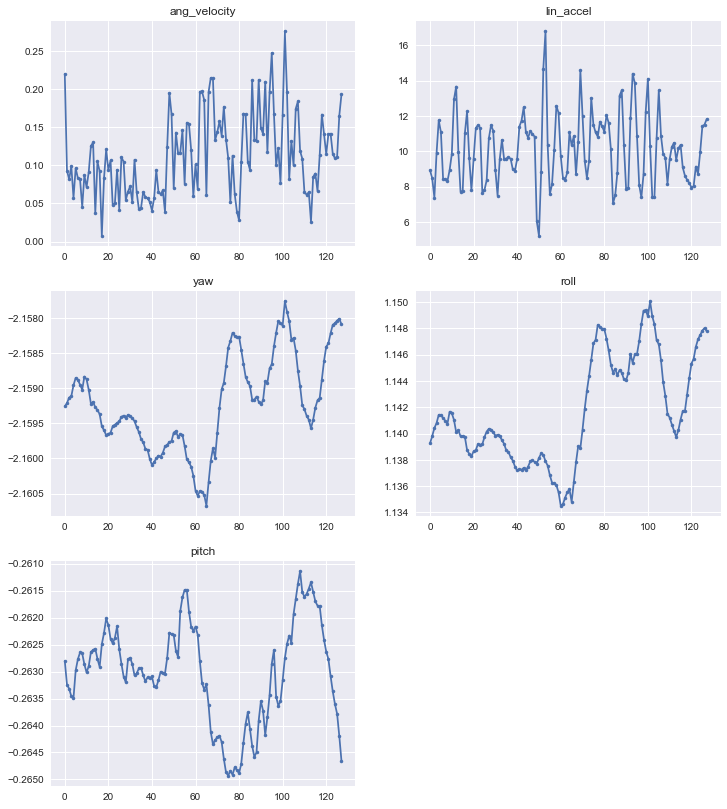

In [16]:
# Plot the computed features for one sample

computed_cols = ['ang_velocity',
                 'lin_accel',
                 'yaw',
                 'roll',
                 'pitch',
                 ]


series = 5
df = X_df[X_df.series_id==series]
surface = y_df[y_df.series_id==series].surface.iloc[0]
print('Seriens #%d, surface: %s' %(series, surface))

plt.figure(figsize=(12,24))

for i, col in enumerate(computed_cols):
    plt.subplot(5,2,i+1)
    plt.plot(df.measurement_number, df[col], '.-')
    plt.title(col)

## How data is organzied

In [17]:
# How long is the longest series?
X_df.measurement_number.max()

127

In [18]:
# All series have 128 measurements
(X_df.groupby('series_id')['measurement_number'].max()==127).all()

True

In [19]:
# Any missing values?
X_df.isnull().any()

row_id                   False
series_id                False
measurement_number       False
orientation_X            False
orientation_Y            False
orientation_Z            False
orientation_W            False
angular_velocity_X       False
angular_velocity_Y       False
angular_velocity_Z       False
linear_acceleration_X    False
linear_acceleration_Y    False
linear_acceleration_Z    False
ang_velocity             False
lin_accel                False
yaw                      False
roll                     False
pitch                    False
dtype: bool

In [20]:
# how many series do we have there?
n_series = X_df.shape[0]//128
n_series

3810

In [21]:
# Making sure number of rows id X_df was a multiple of 128
n_series * 128  == X_df.shape[0]

True

In [22]:
# X and y have the same number of series, good
y_df.shape

(3810, 3)

#### Is everything properly sorted?

In [23]:
# Wondering whether series_id is [1,2,3, ... n_series] ? It is.
(y_df.series_id == np.arange(n_series)).all()

True

In [24]:
# series id and measurement number should be the row number int-divided or modulo 128
(X_df.series_id == (np.arange((n_series*128)) // 128) ).all()

True

In [25]:
(X_df.measurement_number == (np.arange((n_series*128)) % 128) ).all()

True

### Transform the data ito 3D ndarray
The data is all good, sorted, no missing readings, non NaNs. 
Can be safely transformed into a 3D array

In [26]:

X_arr = X_df[X_df.columns[1:]].values

In [27]:
# Two first columns are the series_id and measurement number
# The next 10 are actual measurements from the data
# The rest are our computed features
X_arr.shape

(487680, 17)

In [28]:
X = X_arr.reshape((n_series, 128 , X_arr.shape[1]))

In [29]:
# Check that the series id looks right
X[:,:,0].astype(int)

array([[   0,    0,    0, ...,    0,    0,    0],
       [   1,    1,    1, ...,    1,    1,    1],
       [   2,    2,    2, ...,    2,    2,    2],
       ..., 
       [3807, 3807, 3807, ..., 3807, 3807, 3807],
       [3808, 3808, 3808, ..., 3808, 3808, 3808],
       [3809, 3809, 3809, ..., 3809, 3809, 3809]])

In [30]:
# Check that the measurement number looks right
X[:,:,1].astype(int)

array([[  0,   1,   2, ..., 125, 126, 127],
       [  0,   1,   2, ..., 125, 126, 127],
       [  0,   1,   2, ..., 125, 126, 127],
       ..., 
       [  0,   1,   2, ..., 125, 126, 127],
       [  0,   1,   2, ..., 125, 126, 127],
       [  0,   1,   2, ..., 125, 126, 127]])

In [31]:
# Make absolutely sure they are what they should be
(X[:,:,0].astype(int).transpose() == np.arange(n_series)).all()

True

In [32]:
# Make absolutely sure they are what they should be
(X[:,:,1].astype(int) == np.arange(128)).all()

True

In [33]:
# Get rid of the series_id and measurment number, we don't want the models to see them
X = X[:,:,2:]

In [34]:
# We now have 3810 samples with 128 time points for each of the features
X.shape

(3810, 128, 15)

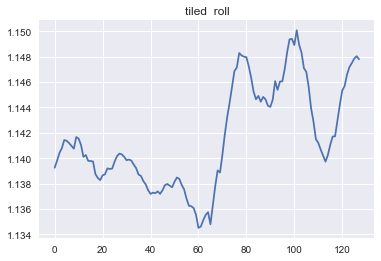

In [35]:
# Here is another way to plot some data
series=5
feature = -2 # only negative numbers, X_df.coluns still has the non-feature columns 
# Addressing is X[series_id, measurement_number, feature]
plt.plot(X[series, :, feature])
plt.title(y_df.surface[series] + '  ' + X_df.columns[feature])

## Defining aggregate features
Aggretes features are where you replace the 128 consecutive measurements with a single number, for example the average of the 128 numbers. This allows to train a model that only uses the aggregates without looking at each of the 128 time points. This would be way faster computationally and might result in fairly good predictions.


There are two ways to compute such aggreagates:

In [36]:
# The Pandas way
aggregates = pd.DataFrame()
aggregates['mean_lin_accel'] = X_df.groupby('series_id').lin_accel.mean()
aggregates['std_lin_accel'] = X_df.groupby('series_id').lin_accel.std()

In [37]:
aggregates.head()

,mean_lin_accel,std_lin_accel
series_id,,
0,9.939676,0.989642
1,10.082444,1.826016
2,10.035741,0.944637
3,10.888094,3.102236
4,9.892815,0.765162


In [38]:
# The numpy way
means = np.mean(X, axis=1)
means.shape
# note the shape, we averaged the 128 measurements in each series, 
# so the axis for measurement number is gone, but the features are still here.

(3810, 15)

In [39]:
stds = np.std(X, axis=1)
stds.shape

(3810, 15)